In [1]:
import torch
print("GPU Available:", torch.cuda.is_available())
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0))
!pip install pyvis

GPU Available: True
Number of GPUs: 2
GPU Name: Tesla T4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.7 MB/s eta 0:00:00:00:010:01


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import networkx as nx
import ast
import json
import matplotlib.pyplot as plt
from pyvis.network import Network
from multiprocessing import Pool
from itertools import combinations

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tripadvisor-european-restaurants/tripadvisor_european_restaurants.csv


In [3]:
# reading (csv) dataset via pandas

resturant_file="/kaggle/input/tripadvisor-european-restaurants/tripadvisor_european_restaurants.csv"
df=pd.read_csv(resturant_file, low_memory=False)
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
0,g10001637-d10002227,Le 147,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"10 Maison Neuve, 87510 Saint-Jouvent France",45.961674,1.169131,...,2.0,0.0,0.0,0.0,0.0,4.0,4.5,4.0,NaN,NaN
1,g10001637-d14975787,Le Saint Jouvent,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Ha...",France,Nouvelle-Aquitaine,Haute-Vienne,Saint-Jouvent,"16 Place de l Eglise, 87510 Saint-Jouvent France",45.957040,1.205480,...,2.0,2.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,g10002858-d4586832,Au Bout du Pont,"[""Europe"", ""France"", ""Centre-Val de Loire"", ""B...",France,Centre-Val de Loire,Berry,Rivarennes,"2 rue des Dames, 36800 Rivarennes France",46.635895,1.386133,...,3.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,g10002986-d3510044,Le Relais de Naiade,"[""Europe"", ""France"", ""Nouvelle-Aquitaine"", ""Co...",France,Nouvelle-Aquitaine,Correze,Lacelle,"9 avenue Porte de la Correze 19170, 19170 Lace...",45.642610,1.824460,...,1.0,0.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN
4,g10022428-d9767191,Relais Du MontSeigne,"[""Europe"", ""France"", ""Occitanie"", ""Aveyron"", ""...",France,Occitanie,Aveyron,Saint-Laurent-de-Levezou,"route du Montseigne, 12620 Saint-Laurent-de-Le...",44.208860,2.960470,...,4.0,7.0,0.0,0.0,0.0,4.5,4.5,4.5,NaN,NaN


In [4]:


# # Print columns
# print("Columns in dataset:", resturant_data.columns)

# # Calculate NaN percentage before imputation
# nan_percent_before = resturant_data.isna().mean() * 100
# # print(f"before data {nan_percent_before.sort_values(ascending=False)}")

# # Fill NaN values
# resturant_data['cuisines'] = resturant_data['cuisines'].fillna('[]')
# resturant_data['special_diets'] = resturant_data['special_diets'].fillna('[]')
# resturant_data['features'] = resturant_data['features'].fillna('[]')
# resturant_data['keywords'] = resturant_data['keywords'].fillna('')
# resturant_data['vegetarian_friendly'] = resturant_data['vegetarian_friendly'].fillna('No')
# resturant_data['vegan_options'] = resturant_data['vegan_options'].fillna('No')
# resturant_data['gluten_free'] = resturant_data['gluten_free'].fillna('No')
# resturant_data['avg_rating'] = resturant_data['avg_rating'].fillna(0)
# resturant_data['total_reviews_count'] = resturant_data['total_reviews_count'].fillna(0)
# resturant_data['city'] = resturant_data['city'].fillna('Unknown')
# resturant_data['country'] = resturant_data['country'].fillna('Unknown')

# # Parse list-like columns (convert string '[]' to actual lists)
# def parse_list(x):
#     if isinstance(x, str) and x.startswith('['):
#         return ast.literal_eval(x)
#     return x if isinstance(x, list) else []
    
# resturant_data['cuisines'] = resturant_data['cuisines'].apply(parse_list)
# resturant_data['special_diets'] = resturant_data['special_diets'].apply(parse_list)
# resturant_data['features'] = resturant_data['features'].apply(parse_list)

# # Calculate NaN percentage after imputation
# nan_percent_after = resturant_data.isna().mean() * 100
# # print(f"before data {nan_percent_after.sort_values(ascending=False)}")

# # Print before and after NaN percentages
# print("\nNaN Percentage Comparison:")
# print(f"{'Column':<30} {'Before (%)':>22} {'After (%)':>22}")
# print("-" * 55)
# for col in resturant_data.columns:
#     print(f"{col:<30} {nan_percent_before[col]:>12.2f} {nan_percent_after[col]:>12.2f}")

In [5]:
# # Analyze each column
# for col in df.columns:
#     print(f"Column: {col}")
#     print(f"Data Type: {df[col].dtype}")

#     # Check for unique values
#     unique_values = df[col].unique()
#     if len(unique_values) <= 10:
#         print(f"Unique Values: {unique_values}")
#     else:
#         print(f"First 10 Unique Values: {unique_values[:10]}")

#     # Check for list-like structures
#     sample_value = df[col].dropna().iloc[0] if not df[col].isnull().all() else None
#     if isinstance(sample_value, str) and "," in sample_value:
#         print("This column contains list-like structures (comma-separated values).")

#     # Check for missing values
#     missing_count = df[col].isnull().sum()
#     print(f"Missing Values: {missing_count} ({missing_count / len(df) * 100:.2f}%)")

df_isnull=df.isna().mean()*100

print("-" * 50)
print(df_isnull)



--------------------------------------------------
restaurant_link                       0.000000
restaurant_name                       0.000092
original_location                     0.000000
country                               0.000000
region                                4.644927
province                             31.441106
city                                 36.984134
address                               0.000000
latitude                              1.457453
longitude                             1.457453
claimed                               0.170021
awards                               75.712227
popularity_detailed                   8.767608
popularity_generic                    9.026423
top_tags                             10.211769
price_level                          25.586650
price_range                          71.909928
meals                                41.356031
cuisines                             15.608590
special_diets                        68.593600
features 

### Handle missing data in the dataset

In [6]:
# Handle location-related columns
df['province'] = df['province'].fillna("Unknown")
df['city'] = df['city'].fillna("Unknown")
df['address'] = df['address'].fillna("Unknown")

# Drop rows with missing latitude or longitude
df = df.dropna(subset=['latitude', 'longitude'])

print(df['province'].isnull().any())
print(df['city'].isnull().any())
print(df['address'].isnull().any())

False
False
False


In [7]:
#converting objects arrays to list 
def parse_list(x):
    if isinstance(x, str) and x.startswith('['):
        return ast.literal_eval(x)
    return x if isinstance(x, list) else []
    

In [8]:
# df['gluten_free'].dtype
print(df['special_diets'].isnull().any())

True


In [9]:
# Handle attributes/features
df['awards']=df['awards'].fillna("None")
df['popularity_detailed']=df['popularity_detailed'].fillna("None")
df['popularity_generic']=df['popularity_generic'].fillna("None")
df['top_tags']=df['top_tags'].fillna("None")
df['price_level']=df['price_level'].fillna("Unknown")
df['price_range']=df['price_range'].fillna("Unknown")

df['cuisines']=df['cuisines'].fillna('[]')
df['special_diets']=df['special_diets'].fillna('[]')
df['features']=df['features'].fillna('[]')
df['meals'] = df['meals'].fillna('[]')

# df['vegetarian_friendly'].fillna('No')
# df['vegan_options'].fillna('No')
# df['gluten_free'].fillna('No')
df['city']= df['city'].fillna('Unknown')


print(df['awards'].isnull().any())
print(df['popularity_detailed'].isnull().any())
print(df['popularity_generic'].isnull().any())
print(df['top_tags'].isnull().any())
print(df['price_level'].isnull().any())
print(df['price_range'].isnull().any())


# print(df['features'].dtype)

# Convert list-like columns to actual lists
list_columns = ['meals', 'cuisines', 'special_diets', 'features']
for col in list_columns:
    df[col].apply(parse_list)
    
    # df[col] = df[col].apply(lambda x:[] 
    #                         if isinstance(x, float) and np.isnan(x) else # Handle NaN/missing values
    #                         (x.split(", ") if isinstance(x, str) else  # Handle strings
    #                          list(x) if isinstance(x, (list, np.ndarray)) else  # Handle lists or arrays
    #                          [])
    #                        )
# print(df['features'].dtype)
# resturant_data['cuisines'] = resturant_data['cuisines'].apply(parse_list)
# resturant_data['special_diets'] = resturant_data['special_diets'].apply(parse_list)
# restur

False
False
False
False
False
False


In [10]:
print(df['special_diets'].isna().mean()*100)

0.0


In [11]:
# Handle numeric ratings/reviews
numeric_columns = [
    'avg_rating', 'total_reviews_count', 'reviews_count_in_default_language',
    'excellent', 'very_good', 'average', 'poor', 'terrible',
    'food', 'service', 'value', 'atmosphere'
]
for col in numeric_columns:
    df[col]=df[col].fillna(0)

# Handle categorical columns
df['default_language']= df['default_language'].fillna("Unknown")

In [12]:
# Function to parse JSON-like strings
def parse_open_hours(value):
    try:
        return json.loads(value) if isinstance(value, str) else {}
    except json.JSONDecodeError:
        return {}

# Apply the function to the column
df['original_open_hours'] = df['original_open_hours'].apply(parse_open_hours)

In [13]:
# Handle numeric operational details
numeric_operational_columns = ['open_days_per_week', 'open_hours_per_week', 'working_shifts_per_week']
for col in numeric_operational_columns:
    df[col] = df[col].fillna(0).astype(float)  # Fill missing values with 0 and ensure float type

In [14]:
# Boolean flags
boolean_columns = ['vegetarian_friendly', 'vegan_options', 'gluten_free']
for col in boolean_columns:
    df[col] = df[col].fillna(False)

In [15]:
# # # Convert valid strings to lists, handle arrays, and fill missing values with empty lists
df['keywords'] = df['keywords'].apply(
    lambda x: 
        [] if isinstance(x, float) and np.isnan(x) else  # Handle NaN/missing values
        (x.split(", ") if isinstance(x, str) else  # Handle strings
         list(x) if isinstance(x, (list, np.ndarray)) else  # Handle lists or arrays
         [])
)
# df['keywords']

In [16]:
# Fill missing value with "Unknown"
df['restaurant_name'] = df['restaurant_name'].fillna("Unknown")

# Fill missing values with "Unknown"
df['region'] = df['region'].fillna("Unknown")

# Fill missing values with "Unclaimed"
df['claimed'] = df['claimed'].fillna("Unclaimed")

In [17]:
# Verify the preprocessing
print("Are there any missing values after preprocessing?", df.isnull().any().any())
print(df['meals'][:10])

# Check for columns with missing values
missing_columns = []

for col in df.columns:
    if df[col].isnull().any():  # Check if any missing values exist in the column
        missing_count = df[col].isnull().sum()  # Count the number of missing values
        missing_percentage = (missing_count / len(df)) * 100  # Calculate percentage
        missing_columns.append((col, missing_count, missing_percentage))

# Print the columns with missing values
if missing_columns:
    print("Columns with missing values:")
    for col, count, percentage in missing_columns:
        print(f"Column: {col}, Missing Values: {count} ({percentage:.2f}%)")
else:
    print("No missing values found in any column.")

Are there any missing values after preprocessing? False
0                                 Lunch, Dinner
1                                            []
2                         Dinner, Lunch, Drinks
3                                 Lunch, Dinner
4                                 Lunch, Dinner
5                         Lunch, Dinner, Drinks
6                                 Lunch, Dinner
7                                            []
8                         Lunch, Dinner, Drinks
9    After-hours, Drinks, Lunch, Dinner, Brunch
Name: meals, dtype: object
No missing values found in any column.


In [18]:
print("\nRandom sample of 5 rows from the cleaned dataset:")
print(df.sample(5))


Random sample of 5 rows from the cleaned dataset:
          restaurant_link         restaurant_name  \
4929    g1079315-d4215001          A l'arbre vert   
821447  g2312160-d4747201          Pappa e Ciccia   
631973   g551706-d2103121           The Half Moon   
940846   g188666-d5871154           't Hoogtepunt   
924392  g1954056-d4262804  Kaffestugan Alunbruket   

                                        original_location  country     region  \
4929    ["Europe", "France", "Grand Est", "Haut-Rhin",...   France  Grand Est   
821447  ["Europe", "Italy", "Puglia", "Province of Tar...    Italy     Puglia   
631973  ["Europe", "United Kingdom (UK)", "England", "...  England     Dorset   
940846  ["Europe", "Belgium", "Flanders", "East Flande...  Belgium   Flanders   
924392  ["Europe", "Sweden", "Skane County", "Tomelill...   Sweden    Unknown   

                      province         city  \
4929                 Haut-Rhin  Pulversheim   
821447     Province of Taranto      Unknown   
63

In [19]:
# Save the cleaned dataset to a CSV file
output_file_path = "/kaggle/working/cleaned_restaurants_data.csv"
os.makedirs(os.path.dirname(output_file_path), exist_ok=True)

# Save the cleaned dataset to a CSV file
df.to_csv(output_file_path, index=False)


print(f"Cleaned dataset saved to: {output_file_path}")

Cleaned dataset saved to: /kaggle/working/cleaned_restaurants_data.csv


### Working on clean and preprocessed dataset

In [20]:
# reading a clean (csv) dataset via pandas


# Load dataset
# df = pd.read_csv('/kaggle/input/your_dataset.csv')  # Update path
print(f"Original dataset size: {len(df)}")

# Reduce to 
target_size = 5000 
reduced_df = df.sample(n=target_size, random_state=42)
print(f"Reduced dataset size: {len(reduced_df)}")

# Save reduced dataset
reduced_df.to_parquet('/kaggle/working/reduced_dataset.parquet')
print("Reduced dataset saved to /kaggle/working/reduced_dataset.parquet")

df = pd.read_parquet('/kaggle/working/reduced_dataset.parquet')
print(f"Reduced dataset size: {len(df)}")
# resturant_file="/kaggle/working/cleaned_restaurants_data.csv"
# df=pd.read_csv(resturant_file, low_memory=False)
df.head()

Original dataset size: 1067607
Reduced dataset size: 5000
Reduced dataset saved to /kaggle/working/reduced_dataset.parquet
Reduced dataset size: 5000


,restaurant_link,restaurant_name,original_location,country,region,province,city,address,latitude,longitude,...,excellent,very_good,average,poor,terrible,food,service,value,atmosphere,keywords
91460,g1941566-d14779976,Auberge de Suzette,"[""Europe"", ""France"", ""Provence-Alpes-Cote d'Az...",France,Provence-Alpes-Cote d'Azur,Vaucluse,Suzette,"le Village, 84190 Suzette France",44.168070,5.068450,...,14.0,10.0,3.0,1.0,0.0,4.0,4.5,4.5,0.0,[]
701674,g187777-d7804595,punto pizza & più s.n.c,"[""Europe"", ""Italy"", ""Calabria"", ""Province of R...",Italy,Calabria,Province of Reggio Calabria,Unknown,"Via Stadio a Monte 19, 89129, Reggio Calabria ...",38.093260,15.636040,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
389450,g187497-d1906009,Bracafe,"[""Europe"", ""Spain"", ""Catalonia"", ""Province of ...",Spain,Catalonia,Province of Barcelona,Unknown,"Ronda Sant Antoni, 56, 08001 Barcelona Spain",41.381435,2.163539,...,4.0,8.0,1.0,1.0,2.0,3.0,3.5,3.0,3.0,[]
566304,g186540-d23285879,The Northern Point,"[""Europe"", ""United Kingdom (UK)"", ""Scotland"", ...",Scotland,Scottish Highlands,Caithness and Sutherland,John O'Groats,John O'Groats KW1 4YR Scotland,58.643696,-3.070416,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]
346212,g1189138-d12874794,Bar Torres,"[""Europe"", ""Spain"", ""Canary Islands"", ""Gran Ca...",Spain,Canary Islands,Gran Canaria,Santa Lucia de Tirajana,"Calle del Molino No 4, 35110 Santa Lucía de Ti...",27.845953,-15.466315,...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,[]


### 1. Graph Construction
- Create an undirected graph where nodes are restaurants.
- Connect two nodes if they share at least one attribute: cuisine, special_diets, features, or are located in the same city.
- Store edge weights based on the number of shared features.

In [21]:
# Creating a graph based on restaurant name
# G= graph
G=nx.Graph()
# G.add_nodes_from(df['restaurant_name'])

# Add nodes with attributes
for index, row in df.iterrows():
    G.add_node(row['restaurant_name'], 
               city=row['city'], 
               cuisines=row['cuisines'], 
               special_diets=row['special_diets'], 
               features=row['features'])


In [22]:
# print("Nodes in G: ", (G.nodes(data=True)[:10]))
print(f"Number of nodes: {G.number_of_nodes()}")

for node, attrs in list(G.nodes(data=True))[:5]:
    print(f"Node: {node}, Attributes: {attrs}")

Number of nodes: 4846
Node: Auberge de Suzette, Attributes: {'city': 'Suzette', 'cuisines': 'French, Bar, Cafe, Diner', 'special_diets': '[]', 'features': 'Reservations, Seating, Table Service'}
Node: punto pizza &  più s.n.c, Attributes: {'city': 'Unknown', 'cuisines': 'Italian, Pizza', 'special_diets': '[]', 'features': '[]'}
Node: Bracafe, Attributes: {'city': 'Unknown', 'cuisines': 'Cafe, Spanish, European', 'special_diets': '[]', 'features': 'Outdoor Seating, Seating, Serves Alcohol, Wheelchair Accessible, Table Service'}
Node: The Northern Point, Attributes: {'city': "John O'Groats", 'cuisines': '[]', 'special_diets': '[]', 'features': '[]'}
Node: Bar Torres, Attributes: {'city': 'Santa Lucia de Tirajana', 'cuisines': 'American, Cajun & Creole, European, Spanish, Contemporary, Central European', 'special_diets': '[]', 'features': '[]'}


In [23]:
# # Add edges by city
# # print(df['special_diets'].dtype)
# # print("\nUnique special_diets values (sample):")
# # print(df['special_diets'].value_counts(dropna=False).head(10))

for city, group in df.groupby('city'):
    group = group.reset_index()
    print(f"Processing city: {city}, {len(group)} restaurants")
    for i in range(len(group)):
        for j in range(i + 1, len(group)):
            row1 = group.iloc[i]
            row2 = group.iloc[j]
            shared = 0
            
            # Checking  the shared attributes
            if set(row1['cuisines']) & set(row2['cuisines']):
                shared += 1
            if set(row1['special_diets']) & set(row2['special_diets']):
                shared += 1
            if set(row1['features']) & set(row2['features']):
                shared += 1
            if row1['city'] == row2['city']:
                shared += 1
            if shared > 0:
                G.add_edge(row1['restaurant_name'], row2['restaurant_name'], weight=shared)


# Function to process edges for a city group
# def process_city_group(city_group):
#     city, group = city_group
#     group = group.reset_index()
#     edges = []
#     print(f"Processing city: {city}, {len(group)} restaurants")
#     for i, j in combinations(range(len(group)), 2):
#         row1 = group.iloc[i]
#         row2 = group.iloc[j]
#         shared = 0
#         if set(row1['cuisines']) & set(row2['cuisines']):
#             shared += 1
#         if set(row1['special_diets']) & set(row2['special_diets']):
#             shared += 1
#         if set(row1['features']) & set(row2['features']):
#             shared += 1
#         if row1['city'] == row2['city']:
#             shared += 1
#         if shared > 0:
#             edges.append((row1['restaurant_name'], row2['restaurant_name'], {'weight': shared}))
#     return edges

# # Parallelize edge creation
# with Pool() as pool:
#     city_groups = [(city, group) for city, group in df.groupby('city')]
#     results = pool.map(process_city_group, city_groups)
#     for edges in results:
#         G.add_edges_from(edges)


Processing city: Aachen, 2 restaurants
Processing city: Aalborg, 2 restaurants
Processing city: Aalen, 1 restaurants
Processing city: Aarhus, 3 restaurants
Processing city: Abbeyfeale, 1 restaurants
Processing city: Aberdeen, 1 restaurants
Processing city: Absdorf, 1 restaurants
Processing city: Addlestone, 1 restaurants
Processing city: Admont, 1 restaurants
Processing city: Aegina, 1 restaurants
Processing city: Agaete, 1 restaurants
Processing city: Agen, 1 restaurants
Processing city: Agia Galini, 2 restaurants
Processing city: Agia Marina, 1 restaurants
Processing city: Agia Pelagia, 1 restaurants
Processing city: Agia Triada, 1 restaurants
Processing city: Agios Ioannis Rentis, 1 restaurants
Processing city: Agria, 1 restaurants
Processing city: Ahaus, 1 restaurants
Processing city: Ahrensburg, 1 restaurants
Processing city: Aigues-Mortes, 1 restaurants
Processing city: Aiguines, 1 restaurants
Processing city: Airdrie, 1 restaurants
Processing city: Aire-sur-l'Adour, 1 restaurant

In [24]:
# Verify
print(f"Edges added: {G.number_of_edges()}")
print(f"Sample edges: {list(G.edges(data=True))[:5]}")

# # Verify
# print(f"Edges added: {G.number_of_edges()}")
# print(f"Sample edges with weights: {list(G.edges(data=True))[:5]}")

# Save graph
# nx.write_gml(G, 'restaurant_graph.gml')

Edges added: 1642024
Sample edges: [('punto pizza &  più s.n.c', 'Bracafe', {'weight': 3}), ('punto pizza &  più s.n.c', 'Sapa Sushi', {'weight': 3}), ('punto pizza &  più s.n.c', 'Bar Sport Paola', {'weight': 4}), ('punto pizza &  più s.n.c', 'Portonovo Silvestre', {'weight': 2}), ('punto pizza &  più s.n.c', 'Come Prima ammare', {'weight': 4})]


Saved graph and DataFrame to /kaggle/working/
Sampled graph: 1000 nodes, 81794 edges
/kaggle/working/restaurant_graph_sampled.html
Sampled visualization saved to /kaggle/working/restaurant_graph_sampled.html


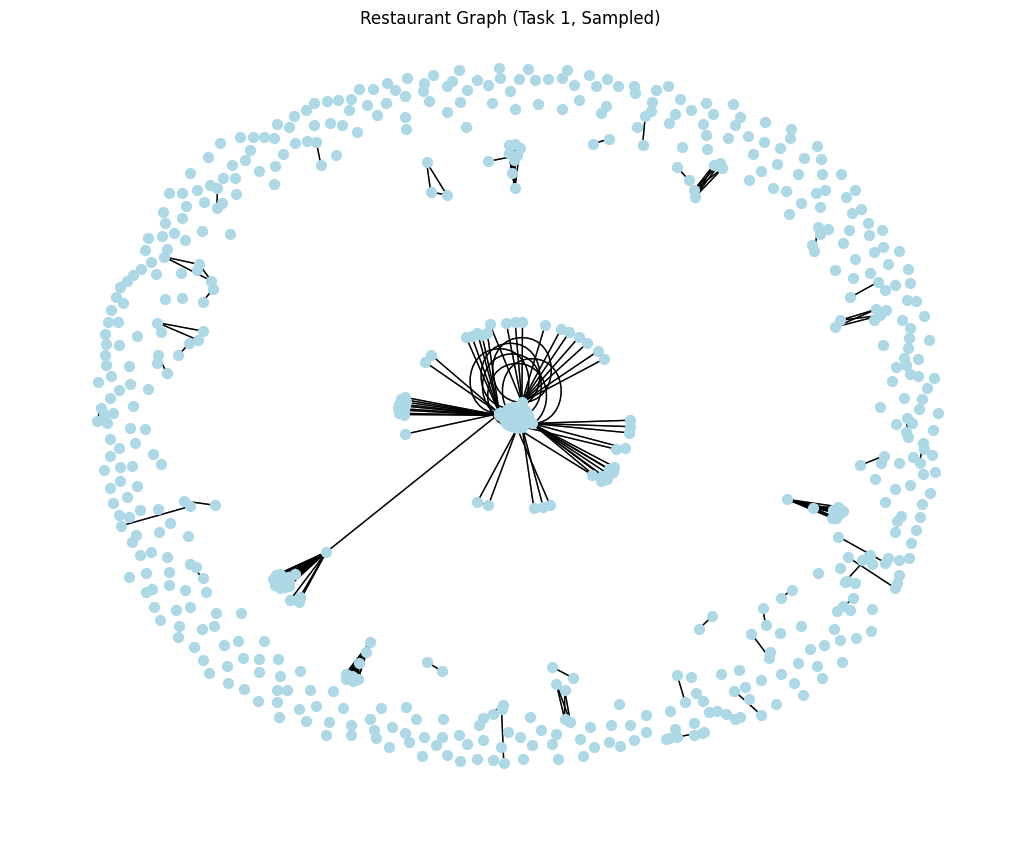

Matplotlib visualization displayed


In [27]:
# Save session data
nx.write_gml(G, '/kaggle/working/restaurant_graph.gml')
df.to_parquet('/kaggle/working/processed_df.parquet')
print("Saved graph and DataFrame to /kaggle/working/")

# Step 3: Visualize with PyVis (sampled subgraph)
# Sample 1000 nodes for visualization
sampled_nodes = list(G.nodes())[:1000]
G_sampled = G.subgraph(sampled_nodes)
print(f"Sampled graph: {G_sampled.number_of_nodes()} nodes, {G_sampled.number_of_edges()} edges")

# net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
# net.from_nx(G_sampled)
# for node in G_sampled.nodes():
#     net.get_node(node)['label'] = node
# # for edge in G_sampled.edges(data=True):
# #     net.get_edge(edge[0], edge[1])['value'] = edge[2]['weight']

# for edge in G_sampled.edges(data=True):
#     weight = edge[2].get('weight', 1)  # Default to 1 if no weight
#     net.nx.get_edge_attributes(edge[0], edge[1])['value'] = weight

# net.show("/kaggle/working/restaurant_graph_sampled.html")
# print("Sampled visualization saved to /kaggle/working/restaurant_graph_sampled.html")


for u, v, data in G_sampled.edges(data=True):
    data['value'] = data.get('weight', 1)

# Now create the PyVis network from the modified graph
net = Network(notebook=True, height="500px", width="100%", directed=False, cdn_resources='in_line')
net.from_nx(G_sampled)

# Optional: Add labels to nodes
for node in G_sampled.nodes():
    net.get_node(node)['label'] = node

# Save and display
net.show("/kaggle/working/restaurant_graph_sampled.html")
print("Sampled visualization saved to /kaggle/working/restaurant_graph_sampled.html")




# Step 4: Alternative Matplotlib visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G_sampled, k=0.1)
nx.draw(G_sampled, pos, node_size=50, node_color='lightblue', with_labels=False)
nx.draw_networkx_edges(G_sampled, pos, alpha=0.5)
plt.title("Restaurant Graph (Task 1, Sampled)")
plt.show()
print("Matplotlib visualization displayed")